## Wisconsin Breast Cancer dataset

## Machine Learning Classifiers 

The research paper I studied to provide analysis for this section of the project was called "Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques". This research paper looks at five types of machine learning classifiers and how well they perform on the Wisconsin breast cancer dataset. Below I have given an overall review on the 5 different classifiers they used.

### Decision Tree Classifier (J48)

The first classification algorithm we will look at that was applied to the Wisconsin breast cancer dataset is the ID3 algorithm which is also called J48. This practical algorithm divides features into groups by generating decision trees from datasets. It is easy and fast to use and the resulting output is comprehensible. This algorithm uses two concepts to create a decision tree, entropy and information gain. Entropy measures the impurity of a set, it assigns high uncertainty values to outcomes with low probability and low uncertainty values to outcomes with high probability. The information gain of an attribute is the reduction in entropy from partitioning the data according to an attribute. This helps partition the nodes of the tree by making the attribute with the highest information gain the root node and so on as you progress down the tree, the information gain of the attributes decreases, until there is no attributes left then we finish with the leaf nodes. Information gain has some drawbacks for example it tends to favour attributes that can take on a large number of different values. An alternative is the information gain ratio. There are some issues with decision tree learning such as a decision tree cannot consider relationships between two attributes and it doesn’t deal well with “noisy” data, missing attributes. The hypothesis found is sensitive to the training set. If you were to replace some training set data with new ones, the new one would be consistent with the original tree. Modifications to reduce this instability would be to alter the attribute selection procedure so that it is less sensitive to some of the training set data being replaced. [1][2][3]

###  Naïve Bayes

The second classification algorithm that was applied to the dataset is Naïve Bayes algorithm. This algorithm is based around Bayes Theorem which calculates the probability of an event occurring based on prior knowledge that represents uncertainty before seeing any data. This theorem uses conditional probability which means events are mutually exclusive and can’t occur together i.e every attribute in the dataset is treated as independent of each other, knowing the Clump Thickness value of a tumor gives us no information on its Marginal Adhesion and vice versa. This assumption is why the algorithm is known as “naïve”. The other assumption with this algorithm is that every attribute is equal, all of them combined make an accurate output. There is no attribute with greater importance than the other attributes like we saw in the J48 algorithm. The process of this algorithm starts by analysing the data in a frequency table. Then you plug in the data to bayes theorem to get the posterior which is the probability distribution that represents uncertainty after seeing the data. The attribute with the highest posterior decides the outcome of prediction, this creates a classifier model. Naïve Bayes is much more faster than other algorithms and can be applied to smaller training sets. When its assumption of independence holds, it performs much better than other models. However in real life most attributes are dependent on each other so this would decrease the accuracy in its performance. An example of the use of this algorithm in the real world is in spam filtering where it identifies spam in your email.

### Multilayer Perceptron

The third algorithm mentioned in this research paper is multilayer perceptron. This algorithm has a structure of three main layers, the input layer, the hidden layer and the output layer. A dataset is processed through this algorithm by passing into the input layer first then the hidden layer and finally through the output layer. A Multilayer Perceptron(MLP) is a neural network and each neuron has inputs that are weighted just like the thetas in the linear regression equation. Each of these weights are given values, the larger the values the more complicated the network therefore it is favourable to keep the values small. The hidden layer and output layer are where most of the computations occur in this approximation function. MLP’s have an activation function that is used to map the weighted inputs to outputs of the network.[4]

## Statistical Analysis Of The Dataset

In [2]:
#Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
#Read in csv file containing the data
dataset = pd.read_csv("breast-cancer-wisconsin.csv",encoding='latin1')
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


First we need to remove missing values from the dataset. In the documentation provided with the dataset it was noted that there were 16 missing values under the Bare Nuclei column therefore I have decided to locate these rows and delete that entire row to prevent these missing values from causing bias or effecting accurate results.

In [70]:
#Find the rows where Bare Nuclei is equal to ?
missing_values=dataset.loc[dataset.loc[:,'Bare Nuclei']=='?']
missing_values

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [77]:
#remove rows containing missing values
dataset.drop([23,40,139,145,158,164,235,249,275,292,294,297,315,321,411,617], axis=0, inplace=True)

In [76]:
#check the Bare Nuclei column now
dataset.loc[:,'Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 683, dtype: object

The Bare Nuclei column now has 683 rows after we deleted the missing value rows but the column has data type object. We need to change this in order to be able to do statistical analysis on the column.[7][8]

In [78]:
#change column to type int 
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('int')

In [79]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Using the .describe() function we get the statistics table above from which we can gain useful information about the dataset.

The "count" row shows us the number of rows under each column, the "mean" gives us the average value, "std" stands for standard deviation of values in each column, "min" shows the smallest value recorded, "25%" and "50%" and "75%" are all percentiles where "50%" is also called the median and lastly "max" stands for the largest value in each column.

This summary of the dataset tells us there are 683 rows under each column therefore there are no values missing.

In [80]:
#dataset.loc locates all the columns where class is equal to 2
benign=dataset.loc[dataset.loc[:,'Class']==2]
benign.count()

Sample code number             444
Clump Thickness                444
Uniformity of Cell Size        444
Uniformity of Cell Shape       444
Marginal Adhesion              444
Single Epithelial Cell Size    444
Bare Nuclei                    444
Bland Chromatin                444
Normal Nucleoli                444
Mitoses                        444
Class                          444
dtype: int64

In [81]:
#dataset.loc locates all the columns where class is equal to 4
malignant=dataset.loc[dataset.loc[:,'Class']==4]
malignant.count()

Sample code number             239
Clump Thickness                239
Uniformity of Cell Size        239
Uniformity of Cell Shape       239
Marginal Adhesion              239
Single Epithelial Cell Size    239
Bare Nuclei                    239
Bland Chromatin                239
Normal Nucleoli                239
Mitoses                        239
Class                          239
dtype: int64

Using the functions .loc and .count() we can see there are 444 rows of the dataset where class equals 2 which stands for the benign tumors. There are 239 cases where the tumor is malignant. We can do a quick check to make sure that all the benign rows contain only the value 2 and all the malignant rows contain only the value 4 by using max and min functions. 

In [82]:
#get the max and min values for benign cases
print("The maximum and minimum values recorded in the Class column for benign cases are",
      benign['Class'].min(),"and",benign['Class'].max())

The maximum and minimum values recorded in the Class column for benign cases are 2 and 2


In [83]:
#get the max and min values for malignant cases
print("The maximum and minimum values recorded in the Class column for malignant cases are",
      malignant['Class'].min(),"and",malignant['Class'].max())

The maximum and minimum values recorded in the Class column for malignant cases are 4 and 4


In [84]:
#get the mean values for benign tumors
#numeric_only=True stops the function producing a warning [5]
#round(,2) round results to 2 decimal places [6]
round(benign.mean(numeric_only=True),2)

Sample code number             1115261.01
Clump Thickness                      2.96
Uniformity of Cell Size              1.31
Uniformity of Cell Shape             1.41
Marginal Adhesion                    1.35
Single Epithelial Cell Size          2.11
Bare Nuclei                          1.35
Bland Chromatin                      2.08
Normal Nucleoli                      1.26
Mitoses                              1.07
Class                                2.00
dtype: float64

In [85]:
#get the mean values for malignant tumors
#numeric_only=True stops the function producing a warning [5]
#round(,2) round results to 2 decimal places [6]
round(malignant.mean(numeric_only=True),2)

Sample code number             1005121.44
Clump Thickness                      7.19
Uniformity of Cell Size              6.58
Uniformity of Cell Shape             6.56
Marginal Adhesion                    5.59
Single Epithelial Cell Size          5.33
Bare Nuclei                          7.63
Bland Chromatin                      5.97
Normal Nucleoli                      5.86
Mitoses                              2.60
Class                                4.00
dtype: float64

In [86]:
#minus the means to look at the difference
difference=round(malignant[1:-1].mean(numeric_only=True),2) - round(benign.mean(numeric_only=True),2)
#get rid of columns that dont give us much information
difference.drop(['Sample code number ','Class'])

Clump Thickness                4.24
Uniformity of Cell Size        5.25
Uniformity of Cell Shape       5.13
Marginal Adhesion              4.23
Single Epithelial Cell Size    3.21
Bare Nuclei                    6.28
Bland Chromatin                3.87
Normal Nucleoli                4.60
Mitoses                        1.55
dtype: float64

<h4>Analysis of the means</h4>
On intial observation of the mean values for all the attributes beloning to benign tumours vs. maligant tumours, it is clear that all values for malignant tumors are greater than for benign. This makes sense since malignant tumors grow uncontrollably and they spread to other parts of the body whereas benign tumors tend to stay put and not spread out while growing slowly over time. After calculating the difference in the means you can see the biggest difference is in the Bare Nuclei with a difference of 6.28. Perhaps this attribute is the easiest attribute to use to distinguish between the two types of tumor and also predict the type. The least obvious attribute appears to be mitosis with a difference of 1.55 so I would guess that this attribute doesn't have much influence/weight in the model used to predict the types of tumor.

In [87]:
#delete Sample code number and class column since they dont apply to this table
new_dataset=dataset.drop(['Sample code number '],axis=1)
#get the correlation between all the columns
new_dataset.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<h4>Relationships Between Attributes</h4>
The table above shows the correlation between each of the attributes. The two attributes with the strongest correlation are Uniformity of Cell Size and Uniformity of Cell Shape, they have a strong positive correlation of 0.907 which is very close to 1. The weakest relationship seems to be between Mitoses and Bare Nuclei with a correlation coefficient of 0.339. When analysing the difference between the means of the two types of tumour above I made an assumption that mitosis would have least weight when predicting tumors and this table helps confirm that assumption as all of the correlation coefficients belonging to mitosis with the other attributes appear to be quite weak. They are all under 0.5 suggesting that mitosis doesn't have much of an effect on the other values.

Sample code number column was removed since it tell us nothing about the type of tumor and also the class column is a result of all the attributes so we know it has a strong relationship with all variables but we can't measure the relationship properly since it has discrete values 2 or 4. Therefore Class column was removed aswell.

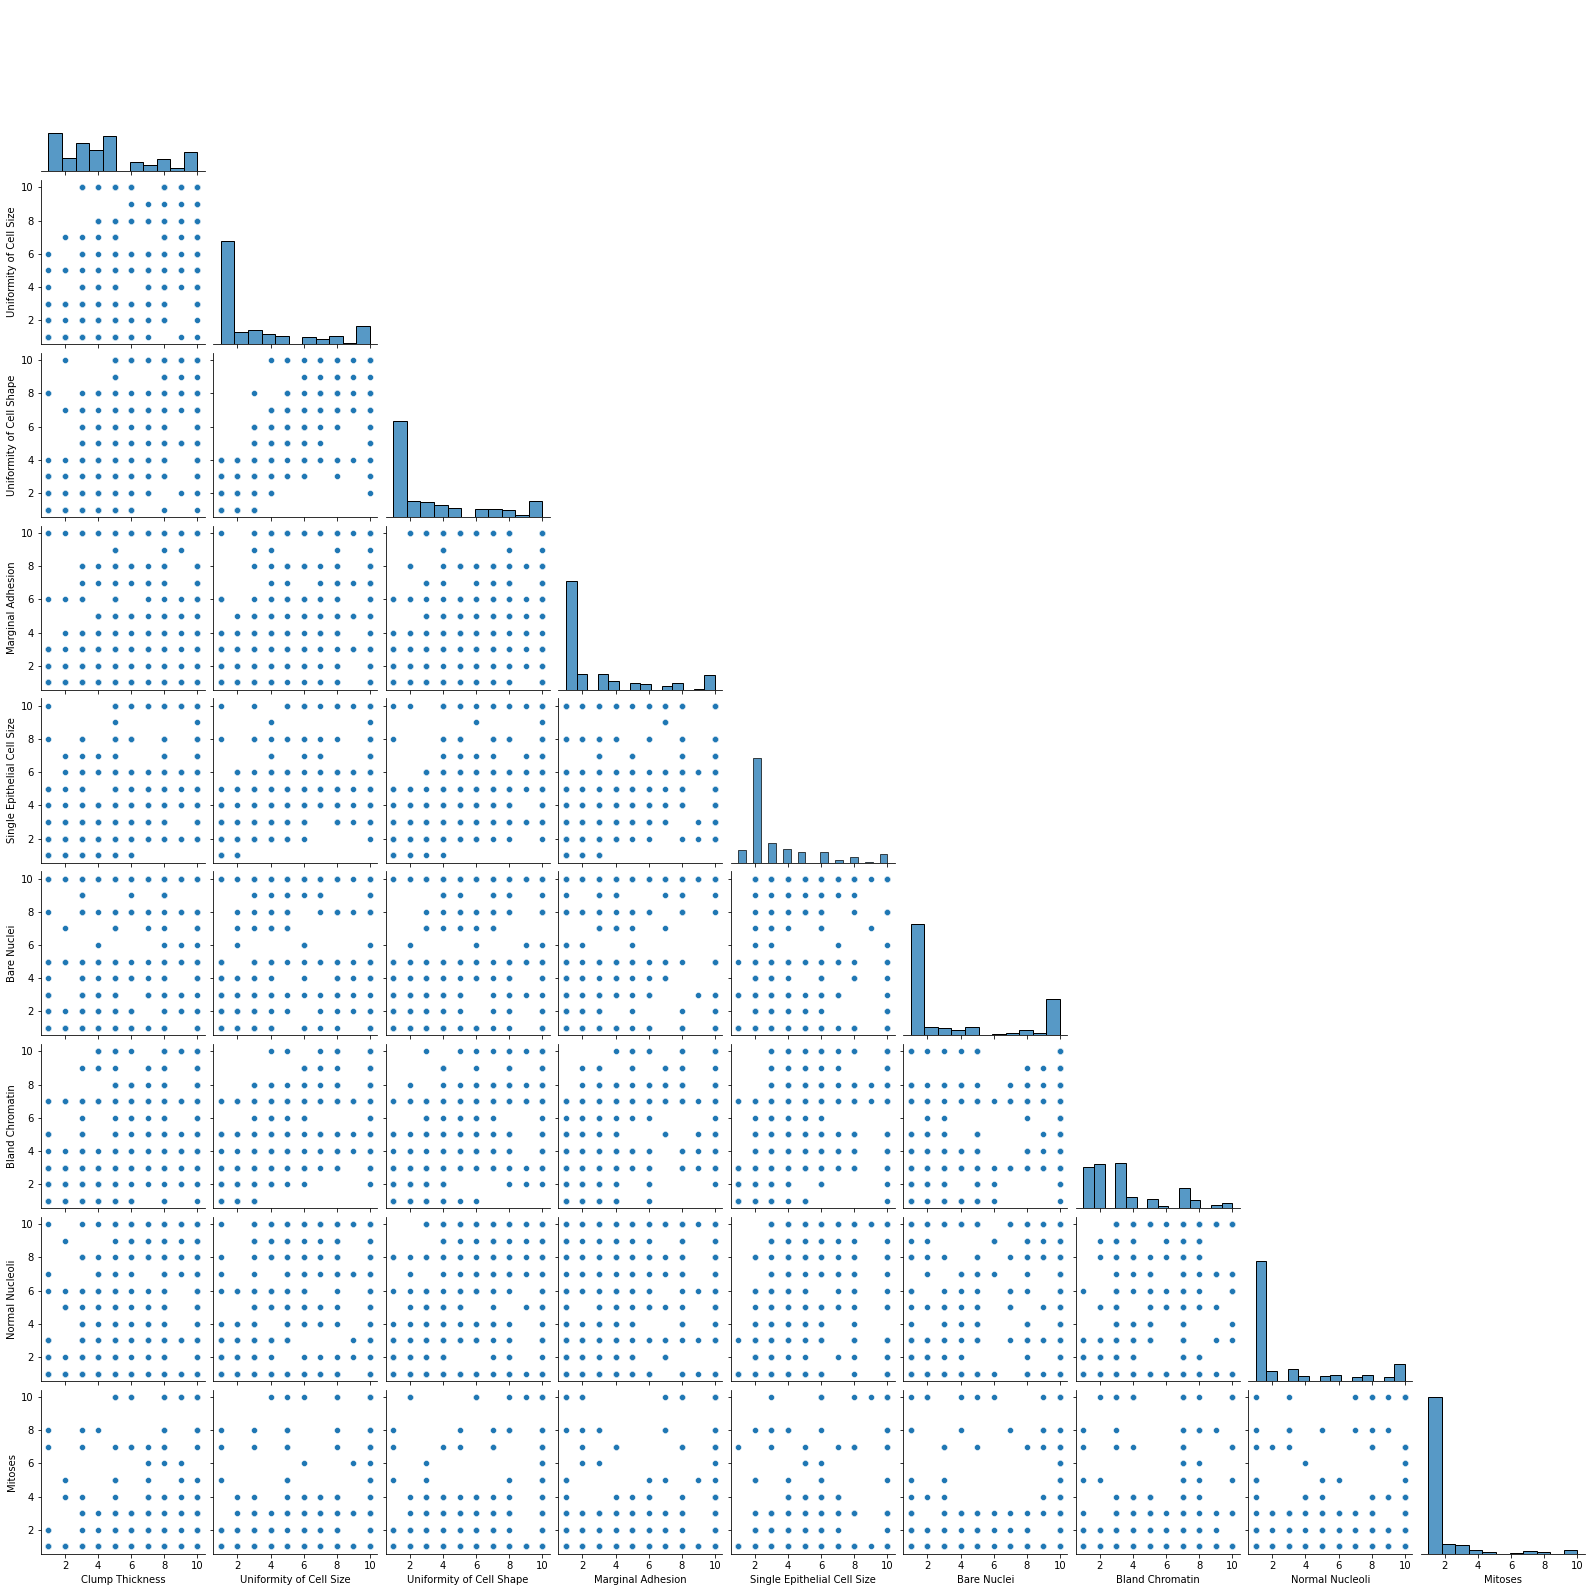

In [89]:
#create a pairplot to show the relationships between all the variables
new_dataset=dataset.drop(['Sample code number ','Class'],axis=1)
sns.pairplot(new_dataset,corner=True)

## Machine Learning Algorithms

## References

[1] https://www.hindawi.com/journals/abb/2022/6187275/ <br>
[2] https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1 <br>
[3] https://en.wikipedia.org/w/index.php?title=ID3_algorithm&oldid=970826747 <br>
[4] https://machinelearningmastery.com/neural-networks-crash-course/ <br>
[5] https://stackoverflow.com/questions/70897794/finding-the-mean-of-nuisance-columns-in-dataframe-error <br>
[6] https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python <br>
[7] https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/#:~:text=Convert%20Column%20to%20int%20(Integer,int64%20%2C%20numpy. <br>
[8] https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/#:~:text=To%20drop%20a%20row%20or%20column%20in%20a%20dataframe%2C%20you,method%20in%20the%20docs%20here.&text=Rows%20are%20labelled%20using%20the,starting%20with%200%2C%20by%20default. <br>
[9] <br>
[10] <br>
[11] <br>
[12] <br>
[13] <br>
[14]  <br>
[15] <br>
[16] <br>
[17] <br>
[18]  <br>
[19]   <br>
[20]  <br>
[21]  <br>